In [8]:
import pandas as pd
import numpy as np
from sklearn import metrics
import os
import glob
import seaborn as sns
import

In [9]:
data = pd.DataFrame(columns=['name', 'error_b','error_m'])
for csv in glob.glob(r'result\a*.csv'):
    data = data.append(pd.read_csv(csv, names=['name','error_b','error_m']))

In [17]:
data.describe()

,error_b,error_m
count,1875.000000,1875.000000
mean,8.104798,0.537507
std,0.654263,0.246234
min,6.995354,0.001701
25%,7.680445,0.397888
50%,7.929521,0.526399
75%,8.330432,0.656016
max,12.491513,2.154067


In [11]:
data['status'] = data['name'].str.split('_').apply(lambda x: x[0])
data['id'] = data['name'].str.split('_').apply(lambda x: x[2])
data.head(5)

,name,error_b,error_m,status,id
0,normal_id_00_00000000.wav,7.792945,0.604346,normal,00
1,normal_id_00_00000001.wav,7.614903,0.693860,normal,00
2,normal_id_00_00000002.wav,7.918942,0.648381,normal,00
3,normal_id_00_00000003.wav,7.511530,0.279288,normal,00
4,normal_id_00_00000004.wav,9.274204,0.031507,normal,00


In [43]:
from sklearn.preprocessing import StandardScaler
#
# X=data[['error_b','error_m']].values
# sc=StandardScaler()
# X=sc.fit_transform(X)
data_na = data
# data_na[['error_b','error_m']]=X
print(data_na.head())

                        name   error_b   error_m  status  id
0  normal_id_00_00000000.wav  7.792945  0.604346  normal  00
1  normal_id_00_00000001.wav  7.614903  0.693860  normal  00
2  normal_id_00_00000002.wav  7.918942  0.648381  normal  00
3  normal_id_00_00000003.wav  7.511530  0.279288  normal  00
4  normal_id_00_00000004.wav  9.274204  0.031507  normal  00


00 auc =  0.6117199017199018  pauc =  0.5144187249450407
02 auc =  0.7034818941504178  pauc =  0.5377510628940039
04 auc =  0.6272126436781609  pauc =  0.5396249243799153
06 auc =  0.8077285318559557  pauc =  0.5929435777810177
Ave auc=  0.6875357428511091 pauc=  0.5461845724999944


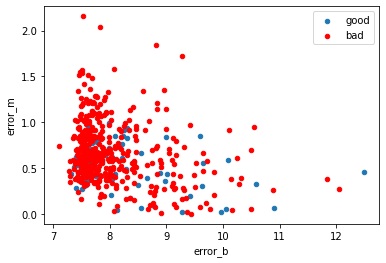

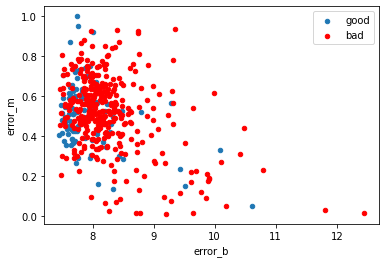

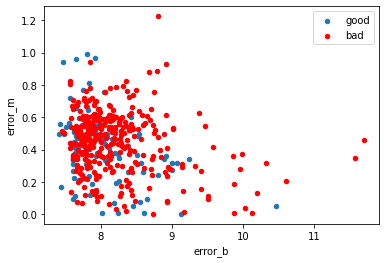

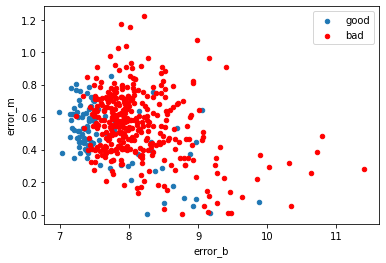

In [102]:
from sklearn.cluster import KMeans
from sklearn.svm import OneClassSVM
ids=['00','02','04','06']
aucs=[]
paucs=[]
for id in ids:
    model= OneClassSVM(coef0=0.1,gamma='auto')
    dataplot=data_na[(data_na['id'] == id)][['status','error_b','error_m']]
    y_true=dataplot['status']
    y_true=y_true.replace('normal', -1)
    y_true=y_true.replace('anomaly', 1)
    y_true=y_true.values
    dataplot['ers']=dataplot['error_b'].values+2*dataplot['error_m'].values
    X=dataplot['ers'].values

    auc = metrics.roc_auc_score(y_true, X)
    aucp=metrics.roc_auc_score(y_true, X,max_fpr=0.1)
    aucs.append(auc)
    paucs.append(aucp)
    print(id, 'auc = ',auc,' pauc = ',aucp)
    ax=dataplot[(dataplot['status'] == 'normal')].plot( kind='scatter',x='error_b',y='error_m', label="good")
    dataplot[(dataplot['status'] == 'anomaly')].plot( color='red',kind='scatter',x='error_b',y='error_m', label="bad",ax=ax)
print('Ave auc= ', np.mean(aucs),'pauc= ',np.mean(paucs))

In [14]:
normal_labels = np.zeros(len(data_na[(data_na['status'] == 'normal') & (data_na['id'] == id)]))
anomaly_labels = np.ones(len(data_na[(data_na['status'] == 'anomaly') & (data_na['id'] == id)]))
y_true = np.concatenate((normal_labels, anomaly_labels), axis=0)
y_pred = data_na[data_na['id'] == id]['BpG'].values
aucs=[]
for i in range(int(np.min(y_pred)),int(np.max(y_pred))):
    y_pred = data_na[data_na['id'] == id]['BpG'].values
    y_new=y_pred
    y_new[y_new<i]=0
    y_new[y_new>=i]=1
    auc = metrics.roc_auc_score(y_true, y_new)
    aucs.append(auc)
    print(i, auc)
print(np.max(aucs),metrics.roc_auc_score(y_true, data_na[data_na['id'] == id]['BpG'].values))

KeyError: 'BpG'

In [ ]:
auc